In [1]:
import pickle
import pandas as pd 
import numpy as np 
# Shared folder to read data
SHARED_FOLDER = './yelp'

# Your folder to write new data and create notebooks.
MY_FOLDER = './output'

In [2]:
with open ('{}/business_review_tip_checkin_df.pickle'.format(SHARED_FOLDER), 'rb') as f:
    business_df = pickle.load(f)

In [3]:
import xgboost as xgb
import operator

In [5]:
#train=business_review_tip_checkin_df.columns[5]
features = list(business_df.columns[5:116])
X = business_df[features]
del X['stars']
#del X['reviews_count']
#del X['avg_review_stars']
X

,latitude,longitude,open,review_count,categories_Fastfood,categories_Sandwiches,categories_Pizza,categories_Vegetarian,categories_Barbeque,categories_Tex-Mex,...,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,avg_review_stars,reviews_count,tip_count,checkin_count
0,33.422218,-111.925847,False,23,0,0,1,0,0,0,...,25,25,25,25,25,25,2.391304,23,3,10
1,33.457226,-112.089834,False,216,0,0,0,1,0,0,...,16,7,16,7,16,7,4.216080,199,45,620
2,33.678615,-111.974607,False,31,0,0,0,0,1,0,...,25,25,25,25,25,25,2.300000,30,7,22
3,33.414355,-111.926294,True,46,0,0,0,0,0,1,...,25,25,25,25,25,25,3.500000,46,9,150
4,33.379200,-111.785500,True,5,1,0,0,0,0,1,...,22,10,22,10,22,10,2.600000,5,7,55
5,33.479867,-112.117920,True,6,0,0,0,0,0,0,...,0,0,0,0,0,0,4.200000,5,2,124
6,33.407353,-111.945569,True,29,1,0,0,0,0,0,...,25,25,25,25,25,25,3.666667,27,15,178
7,33.675854,-111.966734,False,62,0,0,0,0,0,0,...,25,25,25,25,25,25,4.338710,62,15,171
8,33.267073,-111.686889,True,10,0,0,0,0,0,0,...,0,0,0,0,0,0,2.875000,8,3,35
9,33.509568,-112.073327,True,85,0,0,0,0,0,0,...,2,11,1,11,1,11,2.756410,78,30,357


In [6]:
y =business_df['stars']
y

0      2.5
1      4.5
2      2.5
3      3.5
4      2.5
5      4.5
6      3.5
7      4.5
8      3.0
9      2.5
10     2.5
11     3.5
12     4.0
13     3.0
14     3.0
15     4.0
16     3.5
17     4.0
18     2.5
19     4.0
20     2.5
21     3.0
22     4.5
23     4.0
24     4.5
25     3.5
26     1.5
27     4.0
28     4.5
29     4.0
      ... 
152    2.0
153    3.5
154    3.5
155    2.5
156    4.0
157    2.5
158    2.5
159    3.0
160    3.0
161    3.0
162    1.0
163    3.5
164    3.0
165    3.5
166    3.0
167    3.5
168    3.0
169    3.5
170    1.5
171    3.0
172    3.0
173    3.5
174    4.5
175    4.0
176    2.0
177    3.0
178    1.5
179    4.5
180    4.5
181    3.0
Name: stars, dtype: float64

In [8]:
xgb_params = {'booster':'gbtree','objective': 'reg:linear', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
num_rounds = 1000
dtrain = xgb.DMatrix(X, label=y)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
#dtest = xgb.DMatrix(X_test)
#ans = gbdt.predict(dtest)
print (importance)
#do_metrics(y_test, ans)

[('attributes.Open24Hours', 1), ('attributes.Ambience.trendy', 1), ('attributes.HappyHour', 2), ('attributes.Music.dj', 2), ('attributes.Parking.valet', 3), ('categories_Thai', 3), ('attributes.Ambience.intimate', 4), ('attributes.Smoking', 4), ('categories_Empanadas', 4), ('categories_Vegetarian', 6), ('attributes.Parking.validated', 6), ('categories_Salad', 7), ('attributes.GoodForDancing', 9), ('Automotive', 10), ('hours.Wednesday.open', 14), ('attributes.CoatCheck', 14), ('attributes.Corkage', 14), ('categories_Japanese', 15), ('attributes.BYOB/Corkage', 15), ('attributes.Parking.street', 17), ('categories_Barbeque', 18), ('hours.Thursday.open', 22), ('categories_Chinese', 22), ('categories_American_New', 27), ('attributes.Ambience.classy', 27), ('attributes.Parking.garage', 27), ('attributes.ByAppointmentOnly', 30), ('attributes.Ambience.hipster', 30), ('categories_ChickenWings', 32), ('attributes.AcceptsCreditCards', 32), ('attributes.BYOB', 33), ('hours.Tuesday.open', 39), ('att

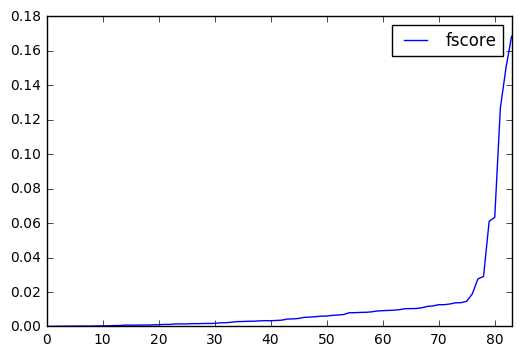

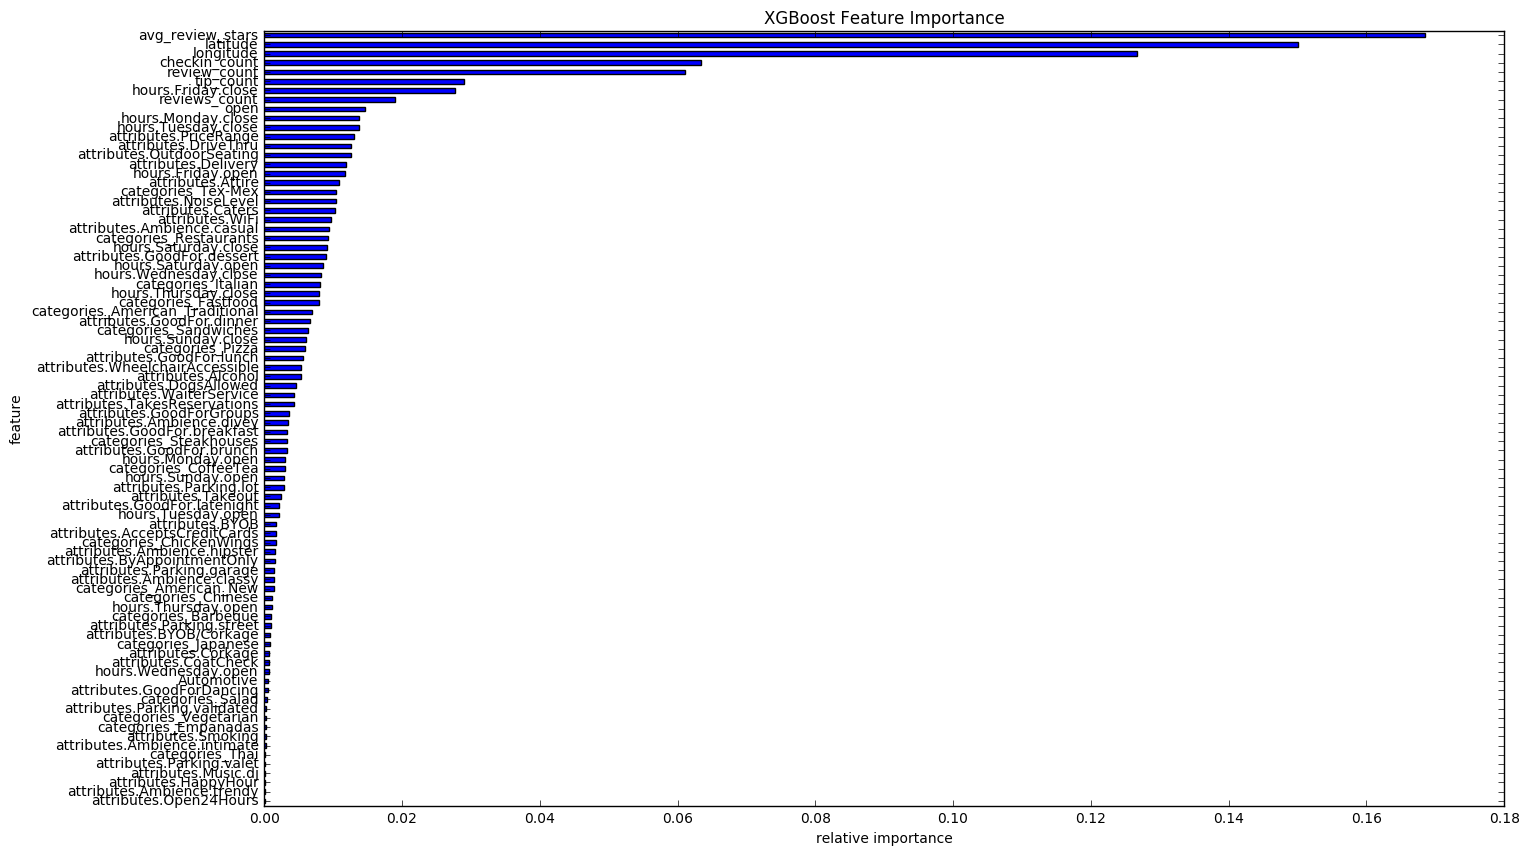

In [9]:
from matplotlib import pylab as plt
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [13]:
from sklearn import cross_validation, metrics
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)
dtest = xgb.DMatrix(X_test)
ans = gbdt.predict(dtest)

((array([-2.34748843, -1.99661927, -1.79203404, -1.64297325, -1.52343695,
         -1.42239925, -1.33409924, -1.25512802, -1.1832925 , -1.11709385,
         -1.05545964, -0.99759433, -0.9428902 , -0.89087166, -0.8411588 ,
         -0.79344271, -0.74746837, -0.70302231, -0.65992369, -0.61801757,
         -0.57716986, -0.53726342, -0.49819498, -0.45987273, -0.4222144 ,
         -0.38514567, -0.34859891, -0.31251206, -0.27682777, -0.24149265,
         -0.20645659, -0.17167223, -0.1370944 , -0.10267977, -0.06838635,
         -0.03417319,  0.        ,  0.03417319,  0.06838635,  0.10267977,
          0.1370944 ,  0.17167223,  0.20645659,  0.24149265,  0.27682777,
          0.31251206,  0.34859891,  0.38514567,  0.4222144 ,  0.45987273,
          0.49819498,  0.53726342,  0.57716986,  0.61801757,  0.65992369,
          0.70302231,  0.74746837,  0.79344271,  0.8411588 ,  0.89087166,
          0.9428902 ,  0.99759433,  1.05545964,  1.11709385,  1.1832925 ,
          1.25512802,  1.33409924,  1.

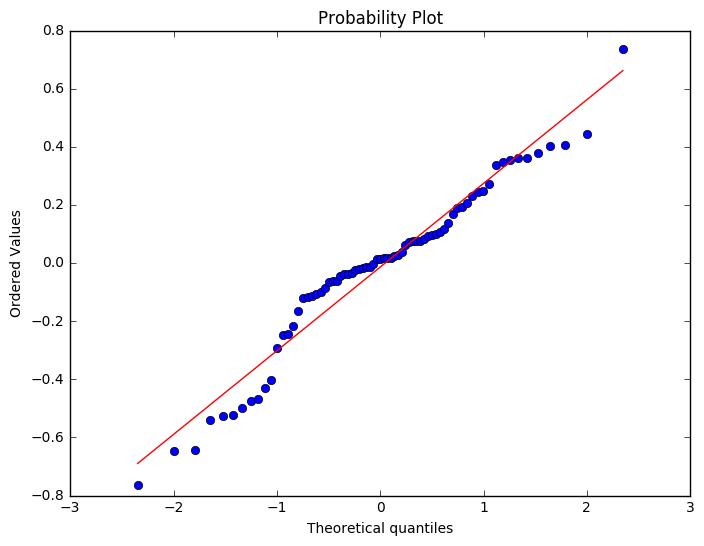

In [15]:
%matplotlib inline
from scipy.stats import probplot
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot(111)
probplot(y_test - ans, plot=ax)

In [20]:
r_square=metrics.r2_score(y_test, ans, sample_weight=None, multioutput='uniform_average')
r_square

0.89684859229218983